In [28]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera
from scipy import integrate


Traceback (most recent call last):
  File "C:\Users\Juane\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "C:\Users\Juane\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


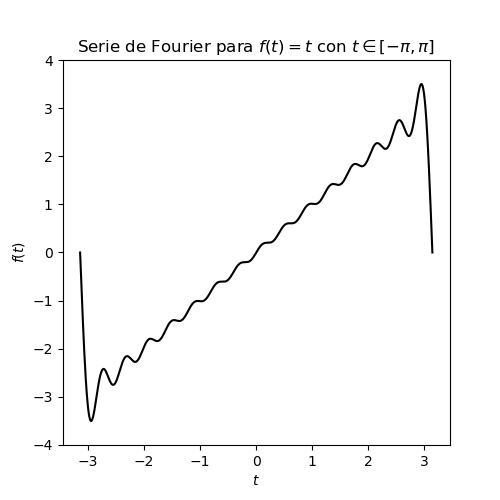

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


In [29]:
#Punto 2. Definiendo la serie
def serie1(t,n):
    m = (-1)**(n-1)
    f = 2*m*np.sin(n*t)/n
    return f

#Datos importantes
L = np.pi
n = 1
arms = 50
t = np.linspace(-L,L,999)
graf = 0

#Graficando
fig2 = plt.figure(figsize=(5,5))
graf2 = fig2.add_subplot(111)
graf2.set_title("Serie de Fourier para $f(t)=t$ con $t \in [-\pi,\pi]$")
graf2.set_xlabel("$t$")
graf2.set_ylabel("$f(t)$")
camera = Camera(fig2)

#Animando
while n < arms:
    graf += serie1(t,n)
    graf2.plot(t,graf,c="black")
    
    camera.snap()
    n += 1 

animation = camera.animate()
animation.save('Fourier.gif')

In [30]:
#Punto 3. Usando la integral obtenida analíticamente
#Resolviéndola por cuadratura de gauss
def intP3():
    f = lambda t: (1/(12**2*np.pi))*t**2*(t**2 - np.pi**2)**2
    inte, err = integrate.quad(f,-np.pi,np.pi)
    
    return inte
    
valorInteQ = intP3()
print("El valor de la suma del punto 3 es aproximadamente",valorInteQ)

El valor de la suma del punto 3 es aproximadamente 1.017343061984449


<IPython.core.display.Javascript object>


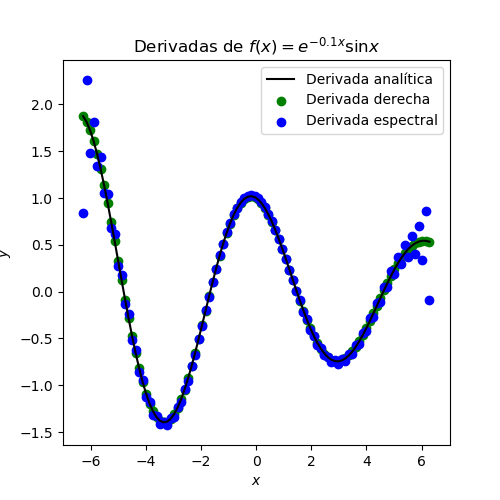

C:\Users\Juane\Anaconda3\lib\site-packages\numpy\core\numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


In [31]:
#Punto 4. Derivada espectral
def f(x):
    return np.exp(-0.1*x)*np.sin(x)

def fp(x):
    return np.exp(-0.1*x)*np.cos(x) - 0.1*np.exp(-0.1*x)*np.sin(x)

def derDer(x):
    dt = 1e-5
    return (f(x+dt)-f(x))/dt

def derEsp(x):
    #Tomando la transformada de fourier
    fourier = np.fft.fft(f(x))
    
    #Hallando las frecuencias
    frecs = (2*np.pi/(4*np.pi))*np.arange(-50,50) #Vector de frecuencias fundamentales
    frecs = np.fft.fftshift(frecs)  #Se re-ordenan las frecuencias para que no hayan problemas de cálculo
    
    derF = fourier*frecs*1j
    derR = np.fft.ifft(derF)
    return derR


x = np.linspace(-2*np.pi,2*np.pi,100)
fig4 = plt.figure(figsize=(5,5))
graf4 = fig4.add_subplot(111)
graf4.plot(x,fp(x),c="black",label="Derivada analítica")
graf4.scatter(x,derDer(x),c="green",label="Derivada derecha")
graf4.scatter(x,derEsp(x),c="blue",label="Derivada espectral")
graf4.set_xlabel("$x$")
graf4.set_ylabel("$y$")
graf4.set_title("Derivadas de $f(x) = e^{-0.1x}\sin{x}$")
graf4.legend()



In [32]:
#Punto 5. Extrayendo los datos usando Numpy
#NOTA: Se hace esto, pues el método dado en clase no funciona
data5 = np.loadtxt("https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionales/ManchasSolares.dat")

<IPython.core.display.Javascript object>


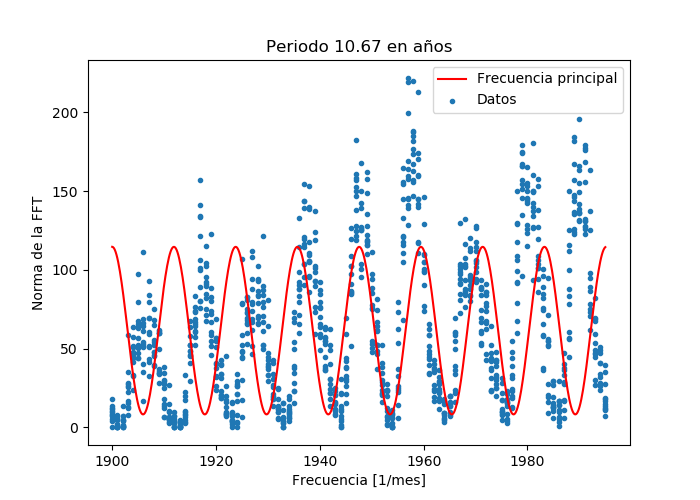

In [33]:
#Filtrando datos
years = data5[:,0]
sunspots = data5[:,3]

mask = years >= 1900
years = years[mask]
sunspots = sunspots[mask]
N = len(years)

sunspots2 = sunspots - np.mean(sunspots)

#Calculando la serie y sus frecuencias
fou = np.fft.fft(sunspots2)
freqs = np.fft.fftfreq(N)
fouN = np.abs(fou)/N

#Haciendo masking
maskF = freqs > 0
fouNN = 2*fouN[maskF]
freqsN = freqs[maskF]

fMaxOsc = freqsN[np.argmax(fouNN)]
perMaxOsc = 1/(12*fMaxOsc)
maskFF = freqsN != fMaxOsc
fouNN[maskFF]=0

#Construyendo la frecuencia principal para graficarla
tG = np.linspace(min(years),max(years),len(fouNN))
fouIn = np.fft.ifft(fouNN)
fPrin = np.real(fouIn)*len(fouIn) + np.mean(sunspots)

fig5 = plt.figure(figsize=(7,5))
gr5 = fig5.add_subplot(1,1,1)
gr5.scatter(years,sunspots,marker=".",label="Datos")
gr5.plot(tG,fPrin,c ="r",label="Frecuencia principal")
gr5.set_xlabel("Frecuencia [1/mes]")
gr5.set_ylabel("Norma de la FFT")
gr5.set_title("Periodo {:.2f} en años".format(perMaxOsc))
gr5.legend()
